# Maze Generators

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from collections import OrderedDict, deque, defaultdict, namedtuple
from itertools import product
from math import sqrt, pi, sin, cos
from random import random, randint, choice, shuffle
import os
from IPython.display import display, clear_output, Image, HTML
import ipywidgets as widgets
import numpy as np
import matplotlib
import matplotlib.animation
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from drawing import VectorImage

-----

# A) Pefect Maze on Square Grid using DFS

Process: start with all edges, then destroy them using random DFS from any point (backtrack from dead ends, don't create loops).

Representation of edges: (x1, y1, x2, y2), where (x1, y1) < (x2, y2) are the neighboring fields. OR? (p1, p2)?

Or using redundancy: for each field we have four boolens whether there is a wall in that direction. TODO: try both and compare

TODO: Also consider: set of (x, y, i_dir), set of (x, y, dx, dy), set of (point, dir) (all with redundancies + add/remove edge)

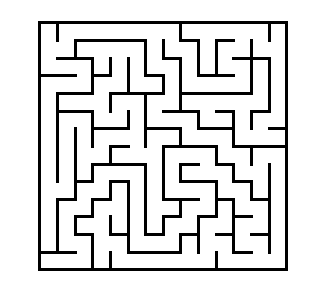

In [16]:
# Directions: right, down, left, up (for origin in top-left corner)??
DIRS = [(1, 0), (0, 1), (-1, 0), (0, -1)]
SHIFTS = [(1, -1), (1, 0), (0, 0), (0, -1)]  # for drawing

def create_perfect_maze(size):
    maze = create_full_maze(size)
    destroy_walls_dfs(maze)
    draw_maze(maze)

def create_full_maze(size):
    return {(x, y): [True] * 4
            for x in range(size) for y in range(size)}
        
def destroy_walls_dfs(maze, visited=None, start=(0, 0)):
    visited = visited or set()
    visited.add(start)
    order = list(range(4))
    shuffle(order)
    for i in order:
        neighbor = move(start, DIRS[i])
        if neighbor in maze and neighbor not in visited:
            maze[start][i] = False
            maze[neighbor][(i+2)%4] = False
            destroy_walls_dfs(maze, visited, neighbor)

def move(point, d):
    return (point[0] + d[0], point[1] + d[1])

def draw_maze(maze, linewidth=3, **kwargs):
    im = VectorImage()
    for point, walls in maze.items():
        for i, is_wall in enumerate(walls):
            if is_wall:
                p1 = move(point, SHIFTS[i])
                p2 = move(point, SHIFTS[(i+1)%4])
                im.line(p1, p2, linewidth=linewidth, **kwargs)
    return im

create_perfect_maze(14)

-----

# B) Braid Maze

In [30]:
def create_braid_maze(size):
    maze = create_empty_maze(size)
    #add_wall_for_each_cell(maze)
    for i in range(1):
        # select random edge
        # check if adding wall makes the points still reachable
        # if so, add the wall
        cell = (0, 0)
        i_dir = 0
        direction = DIRS[i_dir]
        add_wall(maze, cell, i_dir)
        if not is_reachable(maze, cell, move(cell, direction)):
            remove_wall(maze, cell, i_dir)
    draw_maze(maze)

def create_empty_maze(size):
    maze = {(x, y): [False] * 4
            for x in range(size) for y in range(size)}
    for i in range(size):
        maze[(size-1, i)][0] = True
        maze[(i, size-1)][1] = True
        maze[(0, i)][2] = True
        maze[(i, 0)][3] = True
    return maze
    
def add_wall_for_each_cell(maze):
    for cell in maze:
        i_dir = randint(0, 3)
        add_wall(maze, cell, i_dir)
        
def is_reachable(maze, start, end, visited=None):
    if start == end:
        return True
    visited = visited or set()
    visited.add(start)
    for i_dir, d in enumerate(DIRS):
        neighbor = move(start, d)
        is_wall = maze[start][i_dir]
        if is_wall or  neighbor in visited:
            continue        
        if is_reachable(maze, neighbor, end):
            return True
    return False            
            
def add_wall(maze, cell, i_dir):
    set_wall(maze, cell, i_dir, value=True)

def remove_wall(maze, cell, i_dir):
    set_wall(maze, cell, i_dir, value=False)

def set_wall(maze, cell, i_dir, value):
    maze[cell][i_dir] = value
    neighbor = move(cell, DIRS[i_dir])
    maze[neighbor][(i_dir+2)%4] = value            

create_braid_maze(3)

RecursionError: maximum recursion depth exceeded in comparison